In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import numpy as np
import polars.selectors as cs

In [2]:
df = pd.read_excel(r"../dano_base.xlsx")
df

Unnamed: 0                    application_id primary_income_dt  \
0               0  3379c95477164e679ef80291a36a50ec        2023-03-05   
1               1  2e23732fef4749e1ae7a89ec978b7bf7        2023-03-05   
2               2  df795c04bd834c0d8a2960d3b0593938        2023-03-09   
3               3  7c2512d6bf2d47fe91eefc75f8062698        2023-03-13   
4               4  ca547a88dd0c42f2a50657af01b87317        2023-03-03   
...           ...                               ...               ...   
73707       73707  8168937fbe4c447ca420614d4e032d94        2023-03-14   
73708       73708  18de6aaefd9c478a9a2f7a04750e3d56        2023-03-21   
73709       73709  f03232cd563044f299b400a49ad95534        2023-03-03   
73710       73710  269435523adf4ec79361fa9fec903967        2023-03-09   
73711       73711  f50e3c0e54164e5ba48ca78e135b8dc2        2023-03-10   

          party_rk product_code  account_own_flg  sch_flg  success_flg  \
0      772887927.0          DCV                1        0            0   
1      858351423.0          DCV                1        0            0   
2      864683115.0          DCV                0        1            0   
3      294312227.0          DCV                0        1            1   
4      815163498.0          DCV                0        1            0   
...            ...          ...              ...      ...          ...   
73707  380072334.0          DCV                1        0            0   
73708  941415613.0          DCV                1        0            0   
73709  863738223.0          DCV                1        0            0   
73710  956387021.0          DCV                1        0            0   
73711  392912811.0          DCV                1        1            1   

       validation_flg  reject_flg  ...  inkas_flg  cash_out_flg vzr_flg  \
0                   0           1  ...          0             0       0   
1                   0           1  ...          0             0       0   
2                   0           0  ...          0             0       0   
3                   0           0  ...          0             0       0   
4                   0           1  ...          0             0       0   
...               ...         ...  ...        ...           ...     ...   
73707               0           1  ...          0             0       0   
73708               0           1  ...          0             0       0   
73709               0           1  ...          0             0       0   
73710               0           1  ...          0             0       0   
73711               0           0  ...          0             0       0   

      concierge_flg cb_flg invest_flg mobile_flg out_c2c_flg  car_ins_flg  \
0                 0      0          0          0           0            0   
1                 0      0          0          0           0            0   
2                 0      0          0          0           0            0   
3                 0      0          0          0           0            0   
4                 0      0          0          0           0            0   
...             ...    ...        ...        ...         ...          ...   
73707             0      0          0          0           0            0   
73708             0      0          0          0           0            0   
73709             0      0          0          0           0            0   
73710             0      0          0          0           0            0   
73711             0      0          1          0           0            0   

      percent_flg  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
73707           0  
73708           0  
73709           0  
73710           0  
73711           0  

[73712 rows x 66 columns]

In [6]:
df.trial_type.value_counts()

trial_type
1 mon     43287
2 mons       37
3 mons       16
5 mons        7
4 mons        4
6 mons        2
Name: count, dtype: int64

In [3]:
df = df[df["trial_type"].isna()]

In [4]:
df = df.loc[(df["reject_flg"] == 0) | ((df["reject_flg"] == 1) & ((df["account_flg"] == 1) | (df["subscription_time"] >= 1)))]

<Axes: >

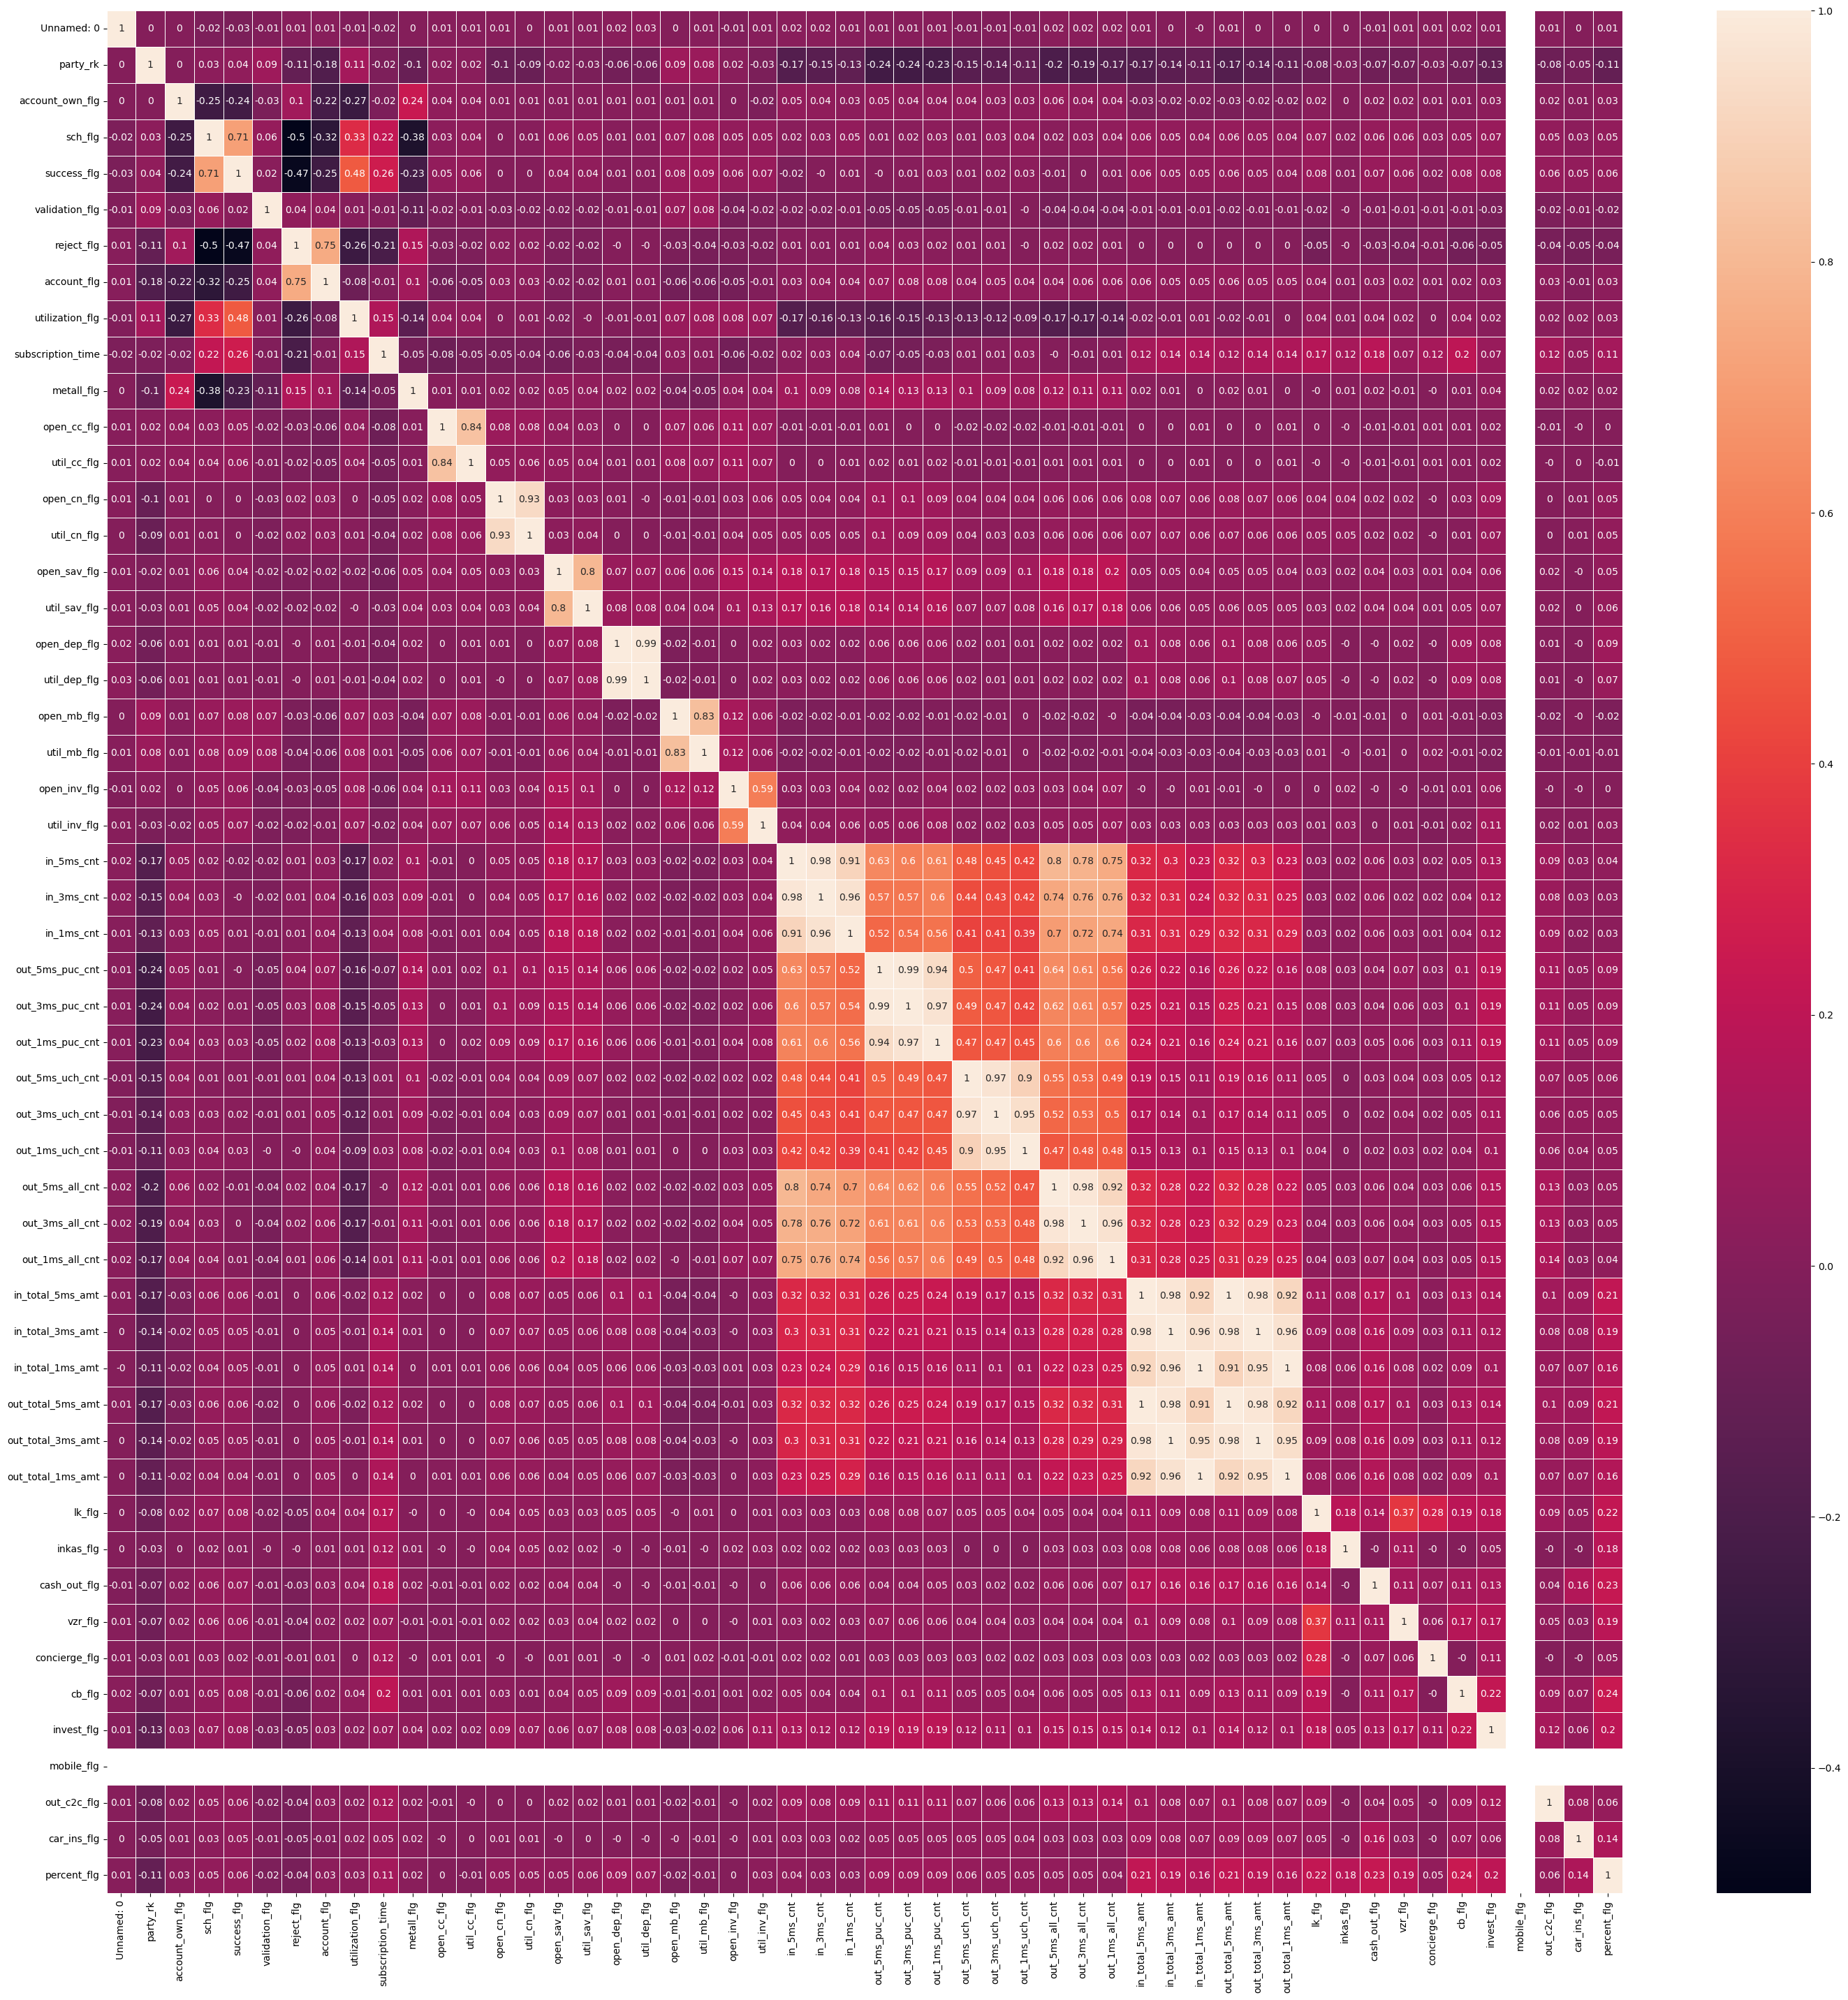

In [15]:
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(
    df.corr(numeric_only=True).round(2),
    annot=True,
    linewidths=0.5,
    fmt="g",
)

In [5]:
dfn = df[
    [
        "account_own_flg",
        "sch_flg",
        "success_flg",
        "validation_flg",
        "reject_flg",
        "account_flg",
        "utilization_flg",
        "metall_flg",
        "open_cc_flg",
        "util_cc_flg",
        "open_cn_flg",
        "util_cn_flg",
        "open_sav_flg",
        "util_sav_flg",
        "open_dep_flg",
        "util_dep_flg",
        "open_mb_flg",
        "util_mb_flg",
        "open_inv_flg",
        "util_inv_flg",
        "lk_flg",
        "inkas_flg",
        "cash_out_flg",
        "vzr_flg",
        "concierge_flg",
        "cb_flg",
        "invest_flg",
        "mobile_flg",
        "out_c2c_flg",
        "car_ins_flg",
        "percent_flg",
    ]
]

In [6]:
pl.from_pandas(dfn).group_by(["metall_flg", "invest_flg"]).count()

shape: (4, 3)
┌────────────┬────────────┬───────┐
│ metall_flg ┆ invest_flg ┆ count │
│ ---        ┆ ---        ┆ ---   │
│ i64        ┆ i64        ┆ u32   │
╞════════════╪════════════╪═══════╡
│ 0          ┆ 1          ┆ 8     │
│ 0          ┆ 0          ┆ 1157  │
│ 1          ┆ 1          ┆ 185   │
│ 1          ┆ 0          ┆ 8021  │
└────────────┴────────────┴───────┘

In [7]:
list = [
        "account_own_flg",
        "sch_flg",
        "success_flg",
        "validation_flg",
        "reject_flg",
        "account_flg",
        "utilization_flg",
        "metall_flg",
        "open_cc_flg",
        "util_cc_flg",
        "open_cn_flg",
        "util_cn_flg",
        "open_sav_flg",
        "util_sav_flg",
        "open_dep_flg",
        "util_dep_flg",
        "open_mb_flg",
        "util_mb_flg",
        "open_inv_flg",
        "util_inv_flg",
        "lk_flg",
        "inkas_flg",
        "cash_out_flg",
        "vzr_flg",
        "concierge_flg",
        "cb_flg",
        "invest_flg",
        "mobile_flg",
        "out_c2c_flg",
        "car_ins_flg",
        "percent_flg",
]

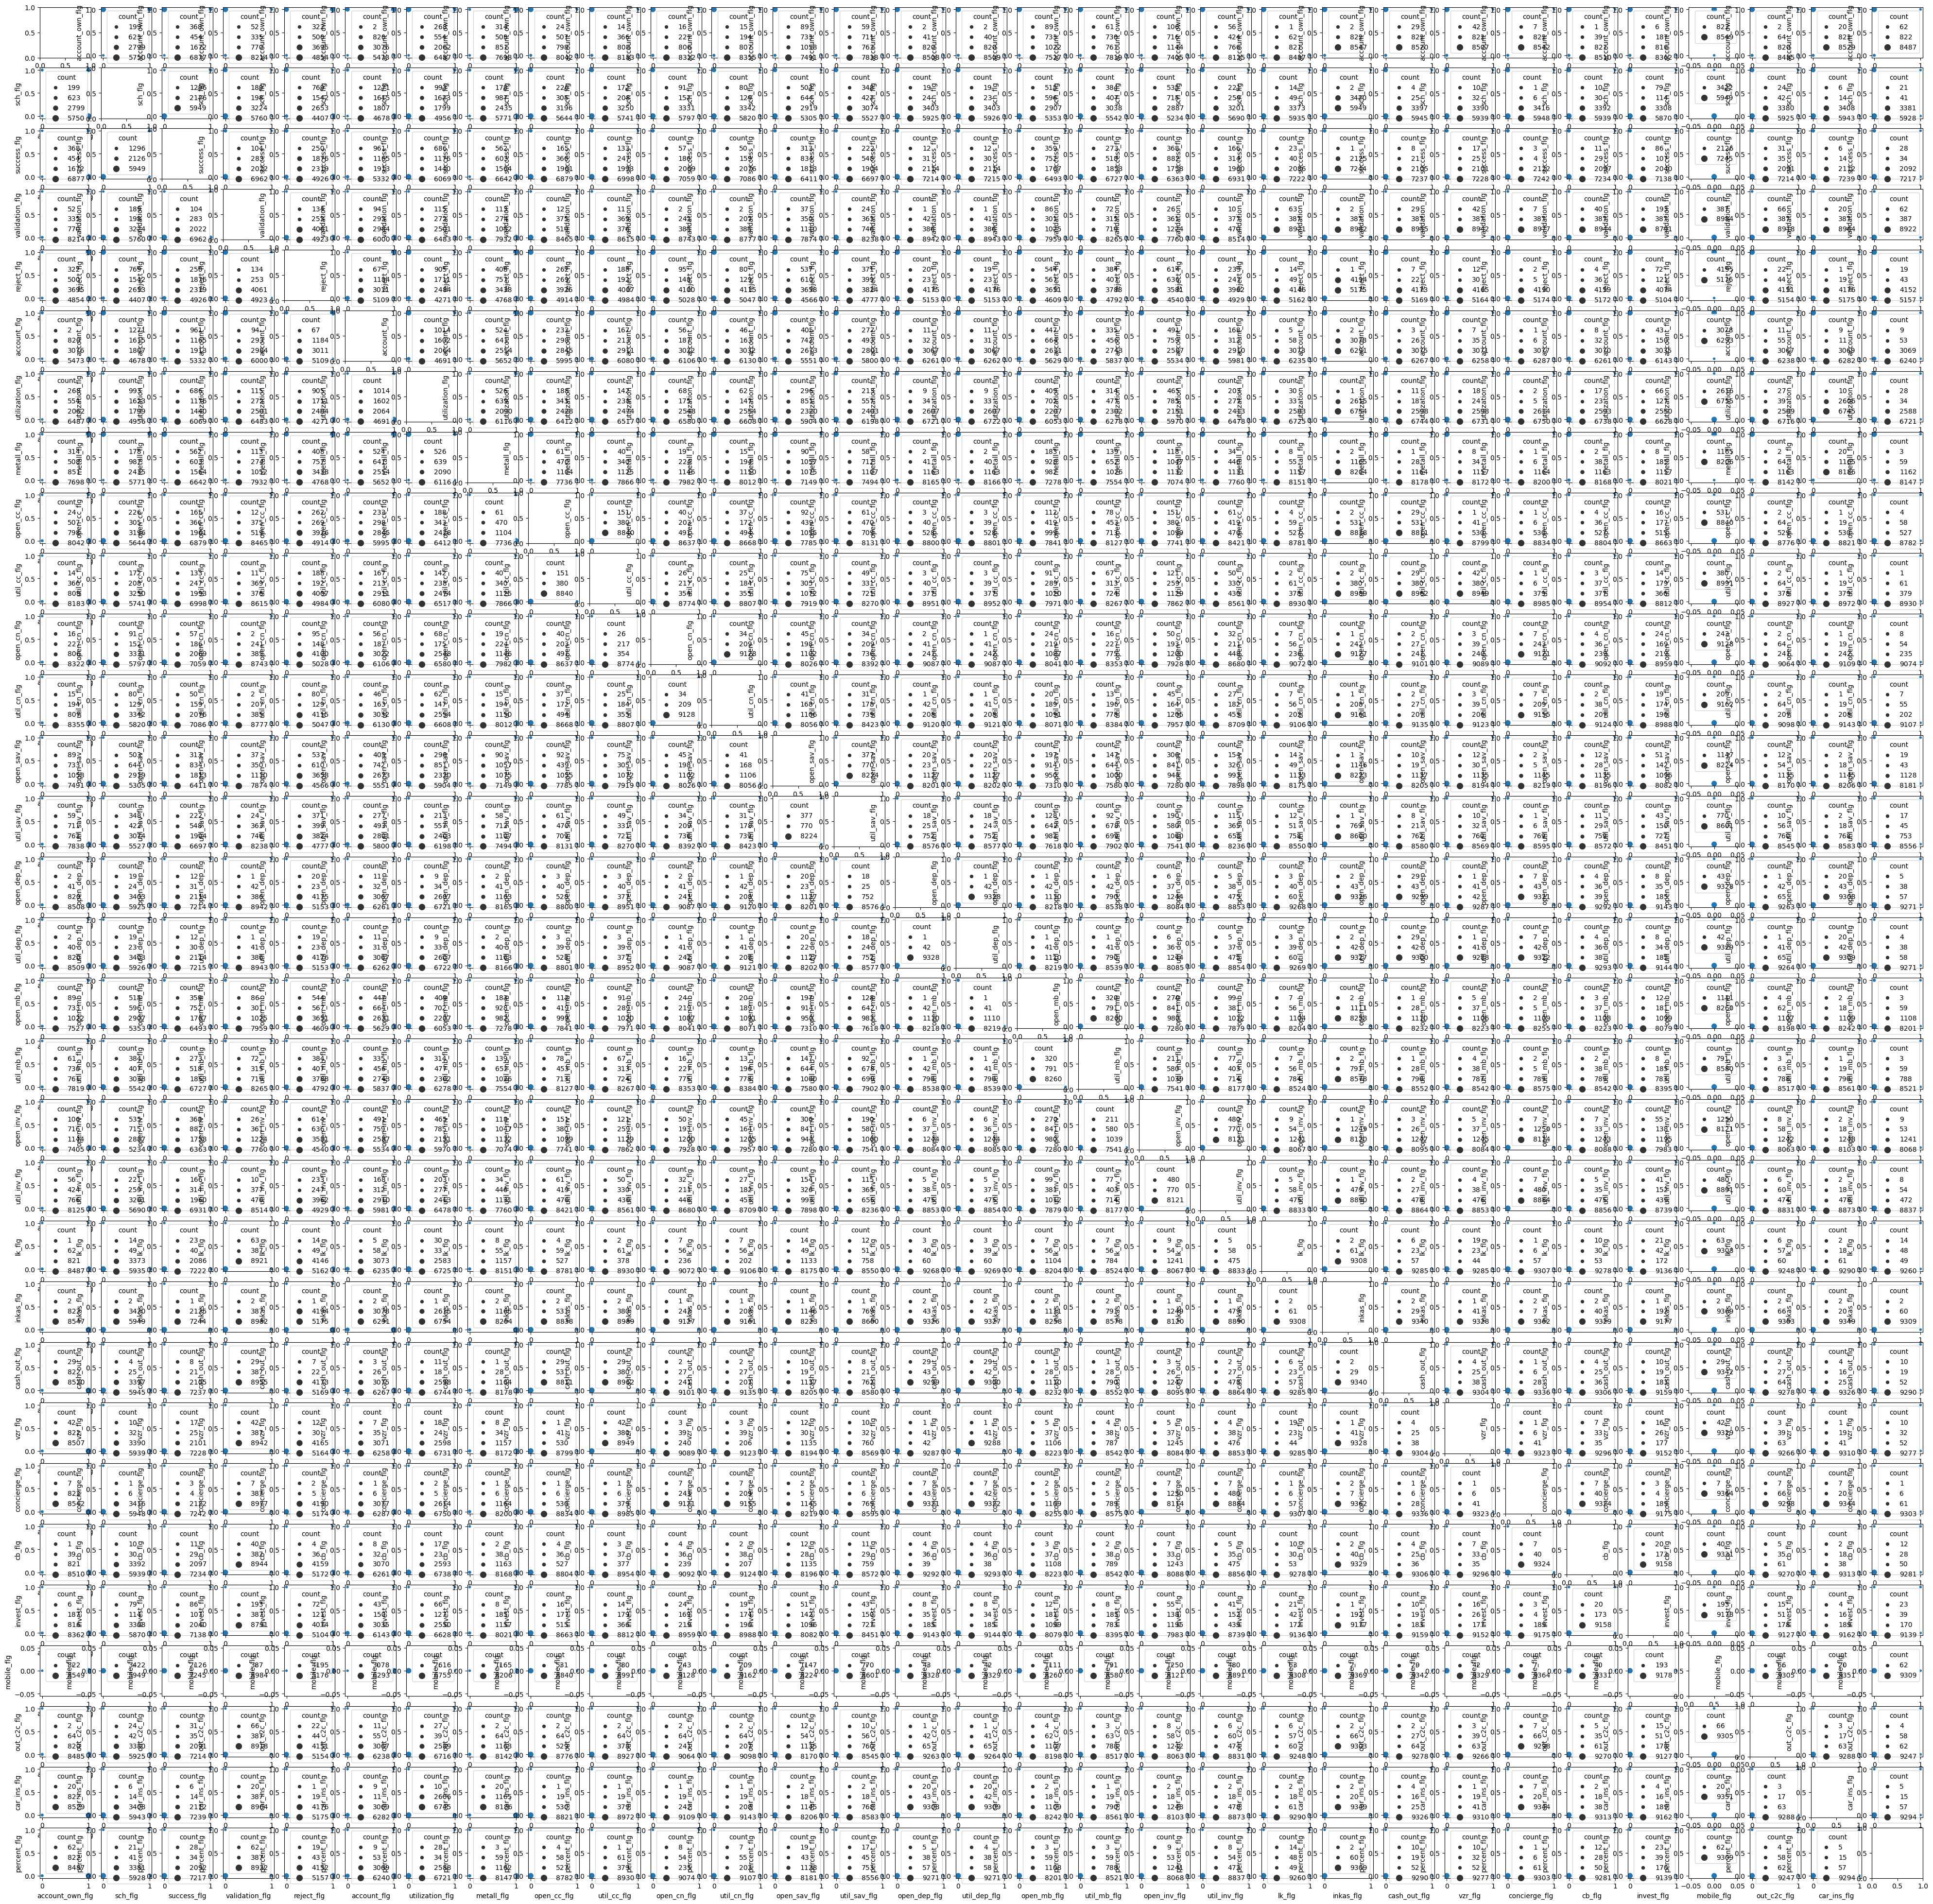

In [23]:
fig, axs = plt.subplots(len(list), len(list), figsize=(50, 50))

for i in list:
    for j in list:
        if i != j:
            sns.scatterplot(
                data=pl.from_pandas(dfn).group_by([i, j]).count().to_pandas(),
                x=j,
                y=i,
                size="count",
                ax=axs[list.index(i)][list.index(j)],
            )

In [14]:
i = "account_own_flg"
for j in list:
    if i != j:
        print(list[list.index(j)])

sch_flg
success_flg
validation_flg
reject_flg
account_flg
utilization_flg
metall_flg
open_cc_flg
util_cc_flg
open_cn_flg
util_cn_flg
open_sav_flg
util_sav_flg
open_dep_flg
util_dep_flg
open_mb_flg
util_mb_flg
open_inv_flg
util_inv_flg
lk_flg
inkas_flg
cash_out_flg
vzr_flg
concierge_flg
cb_flg
invest_flg
mobile_flg
out_c2c_flg
car_ins_flg
percent_flg
